<a href="https://colab.research.google.com/github/akrem-zitouni/Shopping-web-Jsp-Servlet/blob/master/PROJET-IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Projet Intélligence artificielle**

Réaliser par:

zitouni Akrem

SIFI Nizar

NAMOUCHI Brahim





Classe : GLSI-P



1.Étude théorique

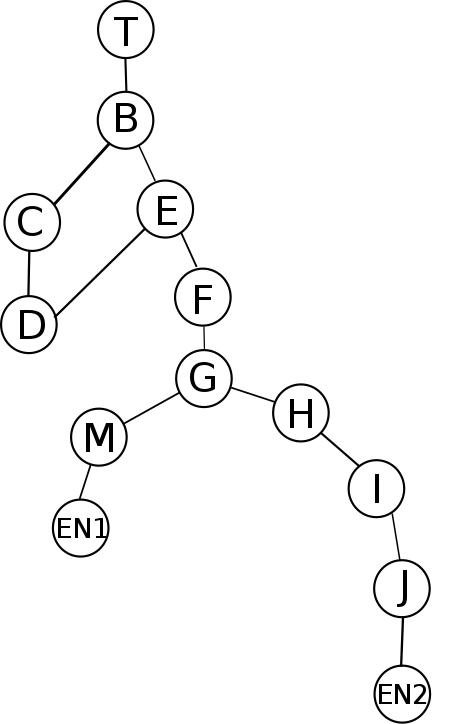

2.Représentation du graphe sous forme d'une liste

In [3]:
graph = {'T': set(['B']),
         'B': set(['T','C', 'E']),
         'C': set(['B','D']),
         'D': set(['C','E']),
         'E': set(['F','D','B']),
         'F': set(['E','G']),
         'G': set(['F','M','H']),
         'M': set(['G','EN1']),
         'EN1': set(['M']),
         'H': set(['G','I']),
         'I': set(['H','J']),
         'J': set(['I','EN2']),
         'EN2': set(['J'])}

3. Méthode de recherche en profondeur

In [4]:
def profondeur(graph, start, goals):
    stack = [(start, [start])]#une liste qui contient des tuples (point de départ, liste de chemin)
    while stack:
        (sommet, path) = stack.pop()
        for next in graph[sommet] - set(path):#si next nest pass dans les neuds visiter
            if next in goals:# si l'un des noeuds d'entrer et trouver on retourne le chemin sans sortir 
                yield path + [next]
            else:
                stack.append((next, path + [next]))# Sinon on ajoute ce noeud à notre path

paths=list(profondeur(graph, 'T',('EN1','EN2')))
print(paths)

[['T', 'B', 'E', 'F', 'G', 'H', 'I', 'J', 'EN2'], ['T', 'B', 'E', 'F', 'G', 'M', 'EN1'], ['T', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'EN2'], ['T', 'B', 'C', 'D', 'E', 'F', 'G', 'M', 'EN1']]


3.Importation des bibliothèques

In [5]:
import cv2
from skimage import io
image_Path="https://zestedesavoir.com/media/galleries/912/e7a7dcbb-5309-4be9-a785-6335db4d3d0f.png.960x960_q85.jpg"
from google.colab.patches import cv2_imshow

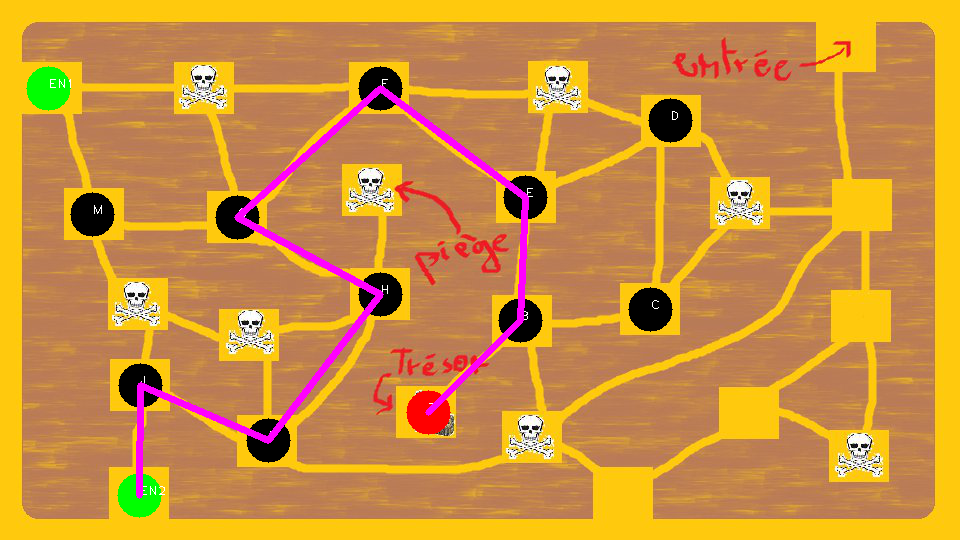

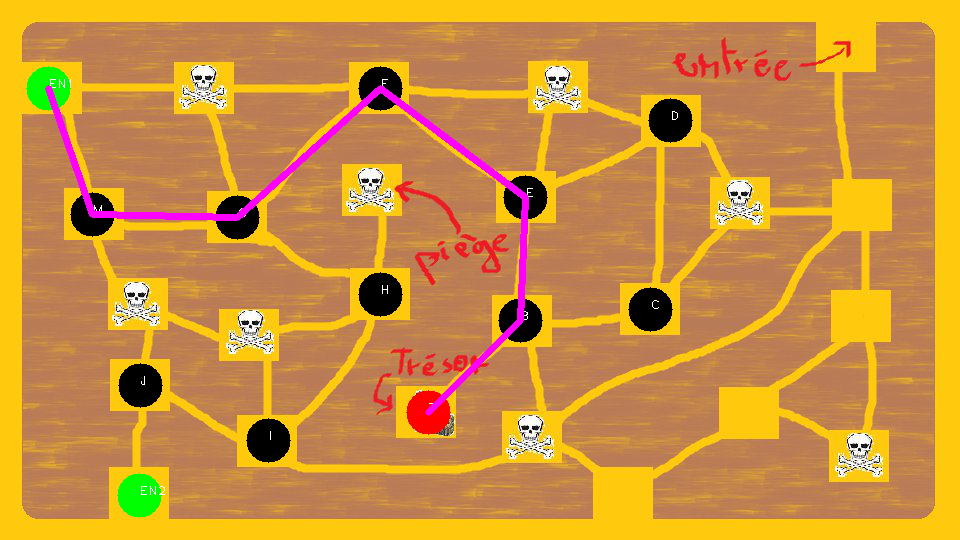

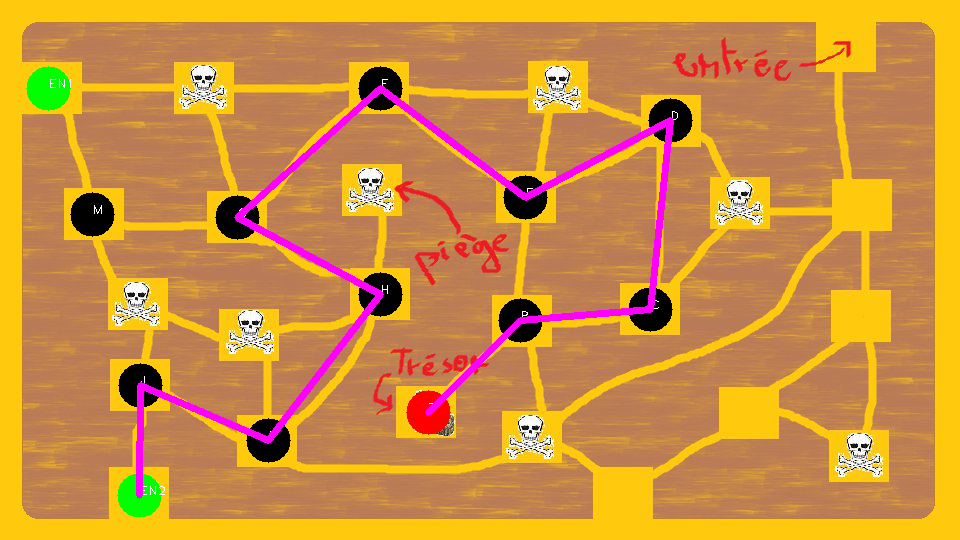

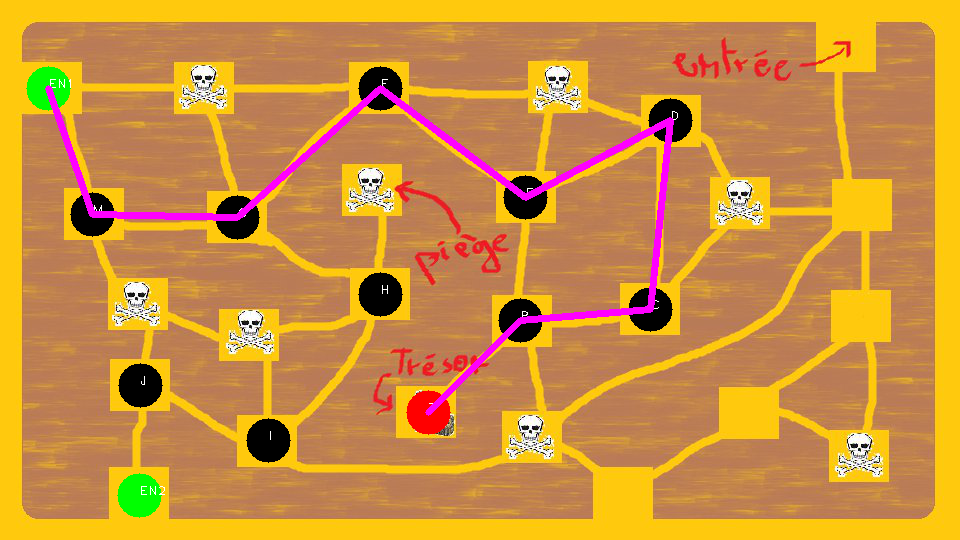

In [6]:
#une liste qui contient les coordonnées des noeuds dans l'image 
position={'T': (428,412),
         'B': (520,320),
         'C':(650,309),
         'D':(670,120),
         'E':(525,197),
          'F':(380,88),
          'G':(237,217),
          'M':(92,214),
          'EN1':(48,88),
          'H':(380,294),
          'I':(268,440),
          'J':(140,385),
          'EN2':(139,495)}

for path in paths:#pour chaque pathe trouver
  image = io.imread(image_Path) #on lit l'image 
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  # on place pour chaque noeud un cercle 
  for point in position:
    if point is 'T':
      COLOR=(0,0,255)
    elif (point in ['EN1','EN2']):
      COLOR=(0,255,0)
    else:
      COLOR=(0,0,0)
    cv2.circle(image,position[point],22,COLOR,-1)
    cv2.putText(image,point,position[point],cv2.FONT_HERSHEY_PLAIN,0.9,(255,255,255))
  
  for point, point2 in zip(path, path[1:]):
    cv2.line(image,position[point],position[point2],(255,0,255),5)#Pour chaque deux noeuds consécutifs dans le path on place une ligne
    

  cv2_imshow(image)